# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2  AC 209 : Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Chris Tanner

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Restart the kernel and run the whole notebook again before you submit. 
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed.

<hr style="height:2pt">

In [44]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<hr style="height:2pt">
<hr style="height:2pt">

<div class='theme'> <b>Linear Regression and Confidence Intervals</b> </div>

In this part of the homework, you will see how *uncertainty* in the $\beta$ coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. 

The data for this supplement are imported for you in the cells below.

First a little review. The linear model assumes:
$$ y_i \sim N(\beta_0+\beta_1 x_i,\sigma^2 )   $$

This means, pun intended, that $ \mu_{y_i} = \beta_0+\beta_1 x_i $, which can be estimated with $ \hat{\mu}_{y_i} = \hat{\beta}_0+\hat{\beta}_1 x_i $.

And for a new observation not in the data set, once we measure the new predictor value, $x^*$, we can predict its response, $y^*$, from our model as:
$$\hat{y}^* = \hat{\mu}_{y_i} + \hat{\varepsilon}^* $$

Which can be calculated by using the estimate for $\hat{\mu}_{y_i}$ and adding on a randomly selected value for $\hat{\varepsilon}^*$ from its assumed (and estimated) distribution, $N(0,\hat{\sigma}^2)$.


In [45]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [120]:
df = df.sort_values(by='disp')
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]

X = X['disp']
X = sm.add_constant(X)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


---- 


<div class='exercise'> <b> Question 1 [20 pts] </b> </div>

**1.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.
 
**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?

**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Pay attention to the confidence interval (in 1.1) above.

**1.4** Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center? 

**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap though takes some care.  Create 500 bootstrap samples in order to create 500 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.

**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.

### Answers

**1.1 Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing**
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.

Text(0, 0.5, 'MPG')

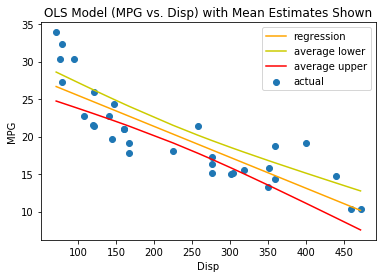

In [121]:
model = OLS(y, X)
results = model.fit()
pred = results.get_prediction(X)
summary = pred.summary_frame()
plt.scatter(X['disp'].values, y)
plt.plot(X['disp'], results.predict(X), color='orange')
plt.plot(X['disp'], summary['mean_ci_upper'], color='#cccc00')
plt.plot(X['disp'], summary['mean_ci_lower'], color='red')
plt.legend(['regression', 'average lower', 'average upper', 'actual'])
plt.title('OLS Model (MPG vs. Disp) with Mean Estimates Shown')
plt.xlabel('Disp')
plt.ylabel('MPG')

**1.2 Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?**


The confidence interval reflects our uncertainty in the estimate of the mean itself, which is dependent on the size and distribution of the underlying data. Because we do not have a perfect representation of the population, we must instead estimate the mean and variance of that distribution - for instance, through repeated sampling (bootstrapping) of the data. We can use these samples to produce both a mean and a standard deviation for our mean estimate, known as the standard error.

**1.3 Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Pay attention to the confidence interval (in 1.1) above.**

In [122]:
summary = results.get_prediction([1, 400]).summary_frame()
print("%.2f with a 95%% confidence interval of [%.2f, %.2f]" % 
      (summary['mean'][0],
       summary['mean_ci_lower'][0], 
       summary['mean_ci_upper'][0]))

13.11 with a 95% confidence interval of [11.11, 15.12]


It would be most appropriate to give both the mean and CI, where the CI is specific to the given value of `disp`.

**1.4 Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center?**

One way to think about the confidence interval is to think of the combined shape of all the linear regressions we obtain from bootstrapping the data. Since these lines mainly pivot around the values of `disp` nearest the median, we see the individual predictions diverging further as we extrapolate, producing the outward curve.

Mathematically speaking, the best-fit regression equation holds for all values of $X$, but the standard error (the standard deviation of the mean estimates produced by our bootstrapping process) widens the farther we are from where the data is concentrated.

**1.5 An alternative way to produce the confidence intervals from 1.1 is through the bootstrap though takes some care.  Create 500 bootstrap samples in order to create 500 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.**

Text(0, 0.5, 'MPG')

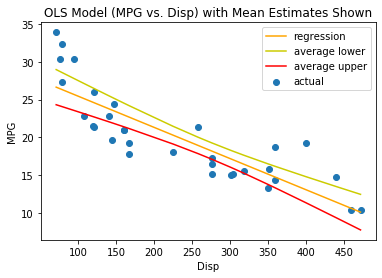

In [124]:
n = 500
slopes, intercepts = [], []
for i in range(n):
    sample = df.sample(frac=1.0, replace=True)
    model = OLS(sample['mpg'], sm.add_constant(sample['disp']))
    results = model.fit()
    slopes.append(results.params['disp'])
    intercepts.append(results.params['const'])
    
y_mean, y_upper, y_lower = [], [], []
z_score = 1.96
for loc in range(len(X)):
    row = X.iloc[loc]
    means = [row['const'] * intercepts[i] + row['disp'] * slopes[i] for i in range(n)]
    point_mean, point_std = np.mean(means), np.std(means)
    y_mean.append(point_mean)
    y_upper.append(point_mean + z_score * point_std)
    y_lower.append(point_mean - z_score * point_std)

plt.scatter(X['disp'].values, y)
plt.plot(X['disp'], y_mean, color='orange')
plt.plot(X['disp'], y_upper, color='#cccc00')
plt.plot(X['disp'], y_lower, color='red')
plt.legend(['regression', 'average lower', 'average upper', 'actual'])
plt.title('OLS Model (MPG vs. Disp) with Mean Estimates Shown')
plt.xlabel('Disp')
plt.ylabel('MPG')

As expected, the actual bootstrapped estimates with $n=500$ produce intervals quite similar in shape to the smooth curves produced by the OLS model fitting. With $n\rightarrow\infty$, they would converge exactly.

**1.6 Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.**

The 95% prediction interval should be significantly wider than the 95% mean interval, since we are combining two sources of error: the standard error of the mean, and the true error term in the model. The edges of our prediction interval represent the result of both error sources coinciding in the same direction.

In [129]:
means = [1 * intercepts[i] + 400 * slopes[i] for i in range(n)]
point_mean, point_std = np.mean(means), np.std(means)
print("Mean and confidence interval: %.2f, [%.2f, %.2f]" %
      (point_mean, point_mean - point_std, point_mean + point_std))

Mean and confidence interval: 13.06, [12.18, 13.94]
